Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [10]:
# Load the CSV files
stats_RO_MW = pd.read_csv('./RO/stats_RO_MW.csv')
stats_RO_TR = pd.read_csv('./RO/stats_RO_TR.csv')

model_2_MW = pd.read_csv('./model_2/stats_MW.csv')
model_2_TR = pd.read_csv('./model_2/stats_TR.csv')

# Model 1 is the same as the RO model
model_1_MW = stats_RO_MW.copy()
model_1_TR = stats_RO_TR.copy()

Prepare Data

In [11]:
# We are only concerned with Venue and Average Space Utilization %
stats_RO_MW = stats_RO_MW[['Venue', 'Average Space Utilization %']]
model_2_MW = model_2_MW[['Venue', 'Average Space Utilization %']]

stats_RO_TR = stats_RO_TR[['Venue', 'Average Space Utilization %']]
model_2_TR = model_2_TR[['Venue', 'Average Space Utilization %']]

# Sort data by Venue to ensure alignment in plotting
stats_RO_MW = stats_RO_MW.sort_values(by='Venue').reset_index(drop=True)
model_2_MW = model_2_MW.sort_values(by='Venue').reset_index(drop=True)

stats_RO_TR = stats_RO_TR.sort_values(by='Venue').reset_index(drop=True)
model_2_TR = model_2_TR.sort_values(by='Venue').reset_index(drop=True)

Plotting

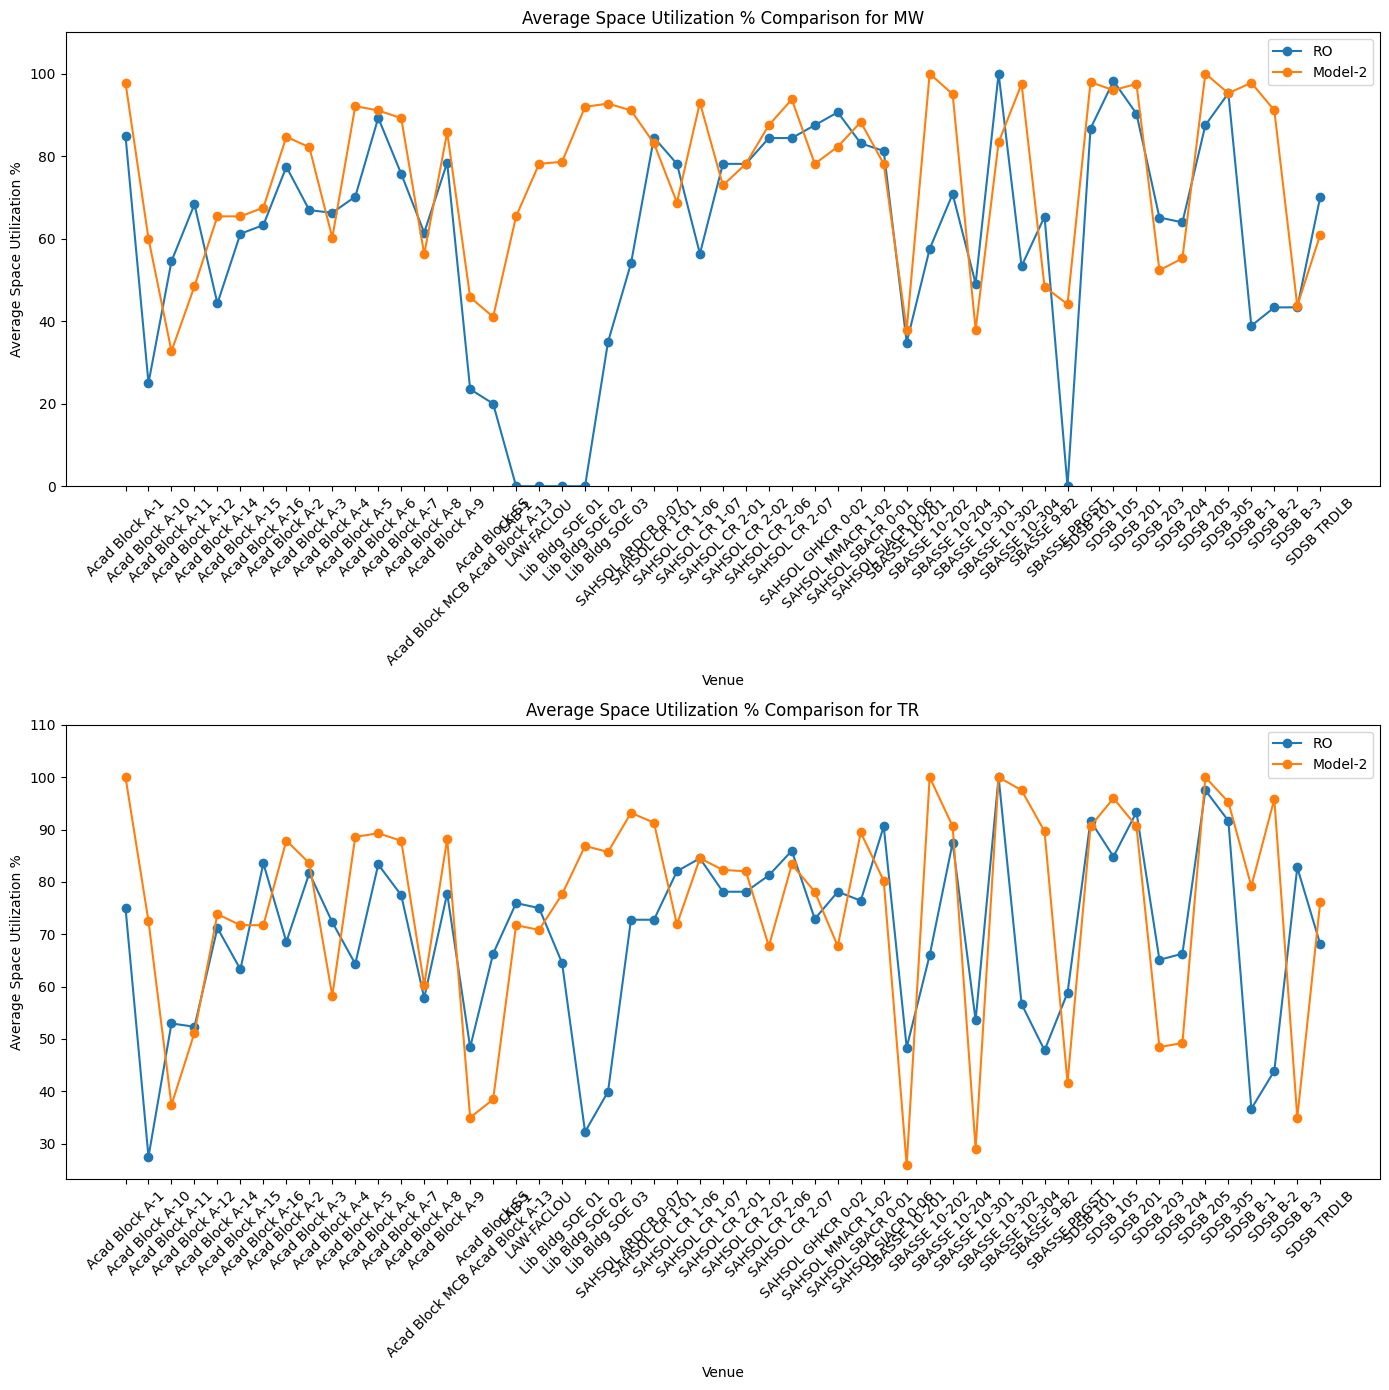

In [12]:
# Determine the y-axis limits
y_min_MW = min(stats_RO_MW['Average Space Utilization %'].min(), model_2_MW['Average Space Utilization %'].min()) * 0.9
y_max_MW = max(stats_RO_MW['Average Space Utilization %'].max(), model_2_MW['Average Space Utilization %'].max()) * 1.1

y_min_TR = min(stats_RO_TR['Average Space Utilization %'].min(), model_2_TR['Average Space Utilization %'].min()) * 0.9
y_max_TR = max(stats_RO_TR['Average Space Utilization %'].max(), model_2_TR['Average Space Utilization %'].max()) * 1.1

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 14))

# Plot data for MW
axs[0].plot(stats_RO_MW['Venue'], stats_RO_MW['Average Space Utilization %'], label='RO', marker='o')
axs[0].plot(model_2_MW['Venue'], model_2_MW['Average Space Utilization %'], label='Model-2', marker='o')
axs[0].set_xlabel('Venue')
axs[0].set_ylabel('Average Space Utilization %')
axs[0].set_title('Average Space Utilization % Comparison for MW')
axs[0].set_xticks(np.arange(len(stats_RO_MW['Venue'])))
axs[0].set_xticklabels(stats_RO_MW['Venue'], rotation=45)
axs[0].legend()
axs[0].set_ylim(y_min_MW, y_max_MW)

# Plot data for TR
axs[1].plot(stats_RO_TR['Venue'], stats_RO_TR['Average Space Utilization %'], label='RO', marker='o')
axs[1].plot(model_2_TR['Venue'], model_2_TR['Average Space Utilization %'], label='Model-2', marker='o')
axs[1].set_xlabel('Venue')
axs[1].set_ylabel('Average Space Utilization %')
axs[1].set_title('Average Space Utilization % Comparison for TR')
axs[1].set_xticks(np.arange(len(stats_RO_TR['Venue'])))
axs[1].set_xticklabels(stats_RO_TR['Venue'], rotation=45)
axs[1].legend()
axs[1].set_ylim(y_min_TR, y_max_TR)

# Adjust layout
plt.tight_layout()
plt.show()

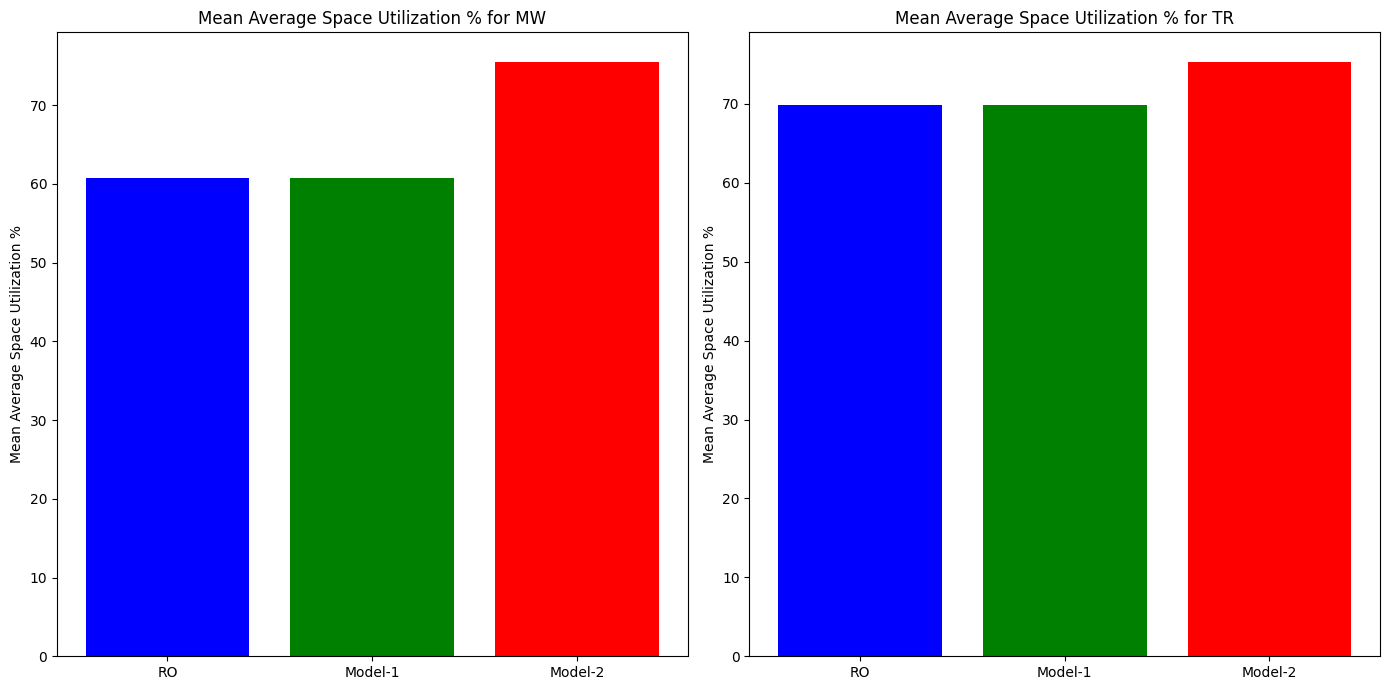

In [13]:
# Calculate the mean average space utilization percentage for each model for MW
mean_utilization_MW = pd.DataFrame({
    'Model': ['RO', 'Model-1', 'Model-2'],
    'Mean Average Space Utilization %': [
        stats_RO_MW['Average Space Utilization %'].mean(),
        stats_RO_MW['Average Space Utilization %'].mean(),  # Model 1 is the same as the RO model
        model_2_MW['Average Space Utilization %'].mean()
    ]
})

# Calculate the mean average space utilization percentage for each model for TR
mean_utilization_TR = pd.DataFrame({
    'Model': ['RO', 'Model-1', 'Model-2'],
    'Mean Average Space Utilization %': [
        stats_RO_TR['Average Space Utilization %'].mean(),
        stats_RO_TR['Average Space Utilization %'].mean(),  # Model 1 is the same as the RO model
        model_2_TR['Average Space Utilization %'].mean()
    ]
})

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Bar plot for MW
axs[0].bar(mean_utilization_MW['Model'], mean_utilization_MW['Mean Average Space Utilization %'], color=['blue', 'green', 'red'])
axs[0].set_title('Mean Average Space Utilization % for MW')
axs[0].set_ylabel('Mean Average Space Utilization %')

# Bar plot for TR
axs[1].bar(mean_utilization_TR['Model'], mean_utilization_TR['Mean Average Space Utilization %'], color=['blue', 'green', 'red'])
axs[1].set_title('Mean Average Space Utilization % for TR')
axs[1].set_ylabel('Mean Average Space Utilization %')

# Adjust layout
plt.tight_layout()
plt.show()
